# Final Project - Customer Retention
#### Team: Mayank Bambal, Danish Muhammad Azhar, Muhammad Murtaza Shafiq
This project focuses on predicting customer attrition and optimizing retention strategies. The notebook is organized into several main sections:

Data Import and Exploratory Data Analysis (EDA)
Data Cleaning and Feature Engineering
Modeling and Validation
Refitting and Final Prediction
Below is a detailed explanation of each part of the code.

## 1. Data Import and EDA

### Library Imports
NumPy, Pandas, Matplotlib, Seaborn:
The code starts by importing essential libraries for numerical computations, data manipulation, and plotting.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

Training and Test Data:

Two CSV files are read using pd.read_csv:

abb.csv as the training dataset

abb_new.csv as the test dataset

In [ ]:
train = pd.read_csv('abb.csv')
test = pd.read_csv('abb_new.csv')

### Data Overview

Data Inspection:

.head() is used to show the first few rows of the training data.

.info() is used on both the training and test data to check data types and verify there are no null values.

.describe() provides summary statistics for the training set.

.columns lists all the feature names.

In [ ]:
train.head()

,propertyid,attrition,latitude,longitude,bedrooms,bathrooms,averagedailyrateusd,rating_overall,rating_communication,rating_accuracy,...,reservationdays4,reservationdays5,reservationdays6,reservationdays7,reservationdays8,reservationdays9,reservationdays10,reservationdays11,reservationdays12,nmon
0,6091945,0,37.724739,-122.45676,1,1.0,100.10000,90,10,10,...,0.0,0.000000,0.5,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,18
1,7840421,1,37.847099,-122.48069,1,1.0,533.35999,89,10,9,...,10.0,9.000000,4.5,7.500000,11.000000,5.0,6.500000,2.000000,0.000000,23
2,14357670,0,37.500595,-122.26466,1,1.0,158.63000,99,10,10,...,26.0,28.000000,28.0,30.000000,17.000000,22.5,29.000000,18.000000,25.000000,20
3,6132191,0,37.796326,-122.41190,3,3.0,576.65002,98,10,10,...,8.0,8.666667,7.5,4.333334,3.666667,11.0,11.666667,6.333334,3.666667,35
4,8249336,0,37.985527,-122.57745,1,1.0,134.53000,98,10,10,...,17.5,24.000000,21.5,27.000000,29.000000,29.5,26.000000,18.000000,21.333334,29


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   propertyid            5247 non-null   int64  
 1   attrition             5247 non-null   int64  
 2   latitude              5247 non-null   float64
 3   longitude             5247 non-null   float64
 4   bedrooms              5247 non-null   int64  
 5   bathrooms             5247 non-null   float64
 6   averagedailyrateusd   5247 non-null   float64
 7   rating_overall        5247 non-null   int64  
 8   rating_communication  5247 non-null   int64  
 9   rating_accuracy       5247 non-null   int64  
 10  rating_cleanliness    5247 non-null   int64  
 11  rating_checkin        5247 non-null   int64  
 12  rating_location       5247 non-null   int64  
 13  rating_value          5247 non-null   int64  
 14  reservationdays1      5247 non-null   float64
 15  reservationdays2     

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   propertyid            1312 non-null   int64  
 1   latitude              1312 non-null   float64
 2   longitude             1312 non-null   float64
 3   bedrooms              1312 non-null   int64  
 4   bathrooms             1312 non-null   float64
 5   averagedailyrateusd   1312 non-null   float64
 6   rating_overall        1312 non-null   int64  
 7   rating_communication  1312 non-null   int64  
 8   rating_accuracy       1312 non-null   int64  
 9   rating_cleanliness    1312 non-null   int64  
 10  rating_checkin        1312 non-null   int64  
 11  rating_location       1312 non-null   int64  
 12  rating_value          1312 non-null   int64  
 13  reservationdays1      1312 non-null   float64
 14  reservationdays2      1312 non-null   float64
 15  reservationdays3     

Great no null values!!!

In [ ]:
train.describe()

,propertyid,attrition,latitude,longitude,bedrooms,bathrooms,averagedailyrateusd,rating_overall,rating_communication,rating_accuracy,...,reservationdays4,reservationdays5,reservationdays6,reservationdays7,reservationdays8,reservationdays9,reservationdays10,reservationdays11,reservationdays12,nmon
count,5.247000e+03,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,...,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000,5247.000000
mean,8.265740e+06,0.234610,37.775880,-122.365562,1.365352,1.284829,199.841965,95.175719,9.858967,9.749952,...,13.592370,16.011912,16.916238,18.457182,18.379296,16.399180,16.202910,12.841846,12.411171,27.324185
std,5.441294e+06,0.423795,0.140524,0.170301,0.986819,0.662294,211.686224,4.948033,0.388952,0.522454,...,9.056921,9.059657,8.759563,8.923064,8.691217,8.671357,8.691474,7.988808,8.447598,9.888991
min,9.580000e+02,0.000000,37.110317,-122.970420,0.000000,0.000000,10.000000,40.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,3.261666e+06,0.000000,37.735798,-122.447375,1.000000,1.000000,91.235001,94.000000,10.000000,10.000000,...,5.666666,8.666667,10.000000,11.666667,12.000000,9.500000,9.250000,6.250000,5.333334,19.000000
50%,7.972559e+06,0.000000,37.777298,-122.411730,1.000000,1.000000,139.480000,96.000000,10.000000,10.000000,...,13.500000,16.500000,18.000000,20.000000,19.750000,17.000000,16.500000,12.666667,12.000000,26.000000
75%,1.328322e+07,0.000000,37.847954,-122.266010,2.000000,1.000000,226.579995,98.000000,10.000000,10.000000,...,21.333334,24.000000,24.500000,26.000000,26.000000,24.000000,23.583333,19.000000,19.000000,36.000000
max,1.813962e+07,1.000000,38.309280,-121.595760,11.000000,8.000000,4014.460000,100.000000,10.000000,10.000000,...,30.000000,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,30.000000,31.000000,44.000000


### Visual Exploration
Box Plots:

A loop creates box plots for selected numerical features (e.g., bedrooms, bathrooms, ratings) to inspect the distributions and detect outliers.

Pair Plots:

A Seaborn pairplot is generated for a subset of features (including attrition, location coordinates, and reservation counts) to visualize potential relationships and distributions.

In [ ]:
train.columns

Index(['propertyid', 'attrition', 'latitude', 'longitude', 'bedrooms',
       'bathrooms', 'averagedailyrateusd', 'rating_overall',
       'rating_communication', 'rating_accuracy', 'rating_cleanliness',
       'rating_checkin', 'rating_location', 'rating_value', 'reservationdays1',
       'reservationdays2', 'reservationdays3', 'reservationdays4',
       'reservationdays5', 'reservationdays6', 'reservationdays7',
       'reservationdays8', 'reservationdays9', 'reservationdays10',
       'reservationdays11', 'reservationdays12', 'nmon'],
      dtype='object')

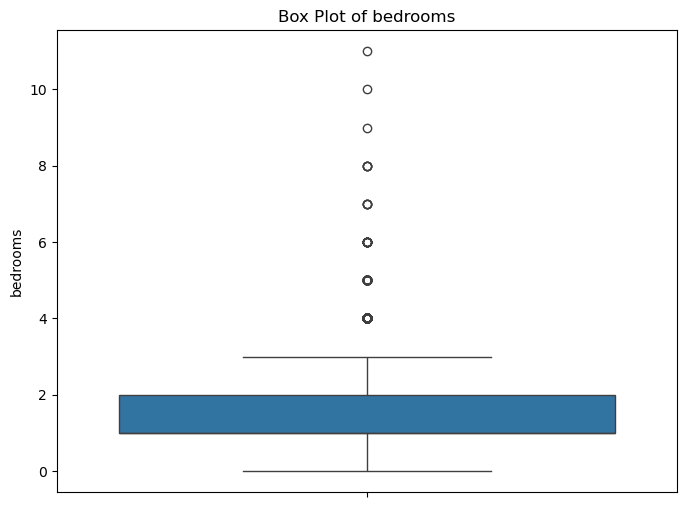

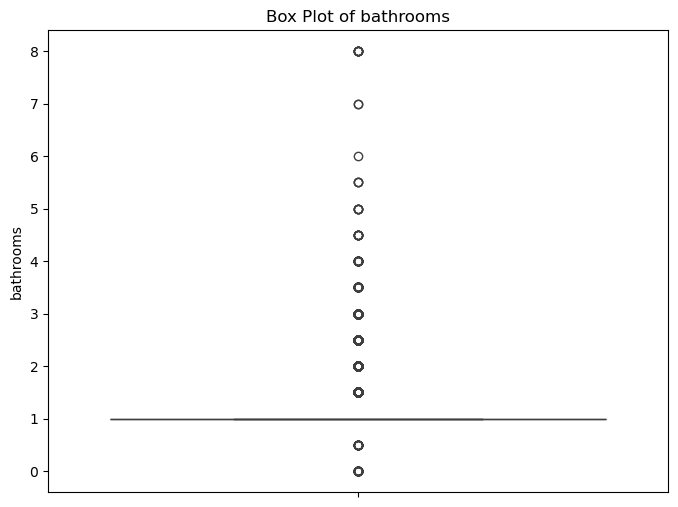

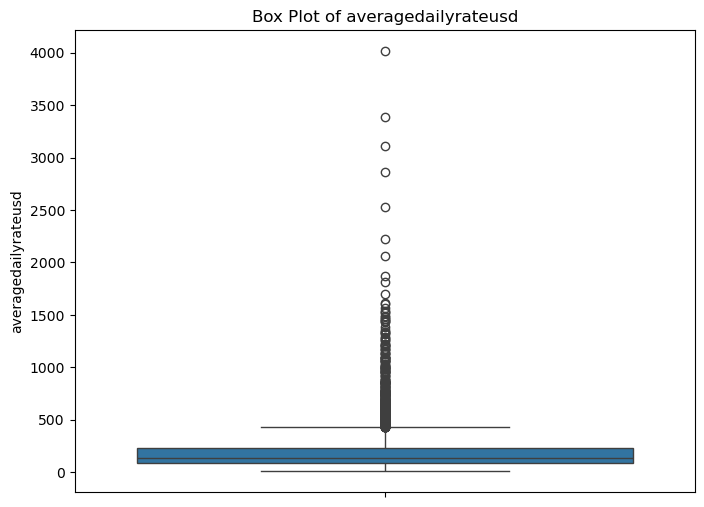

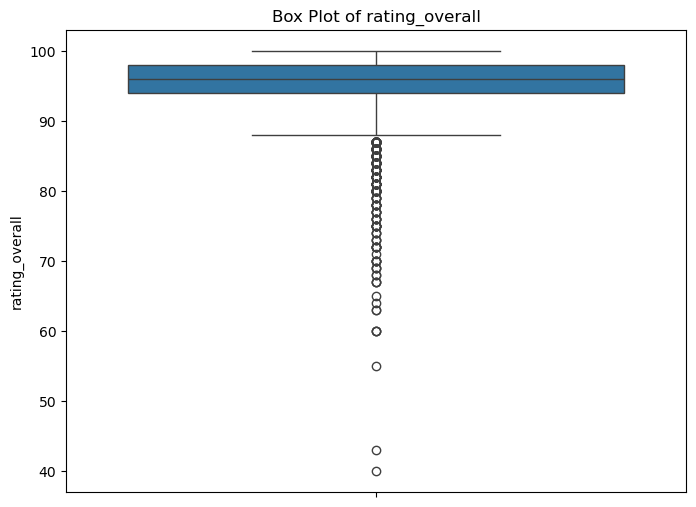

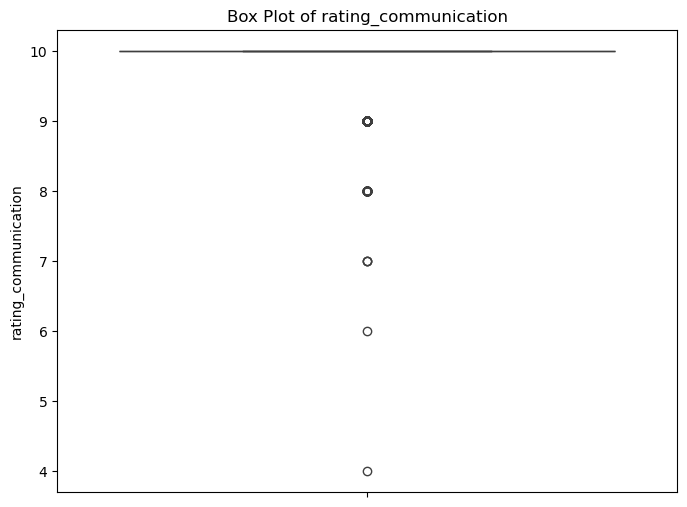

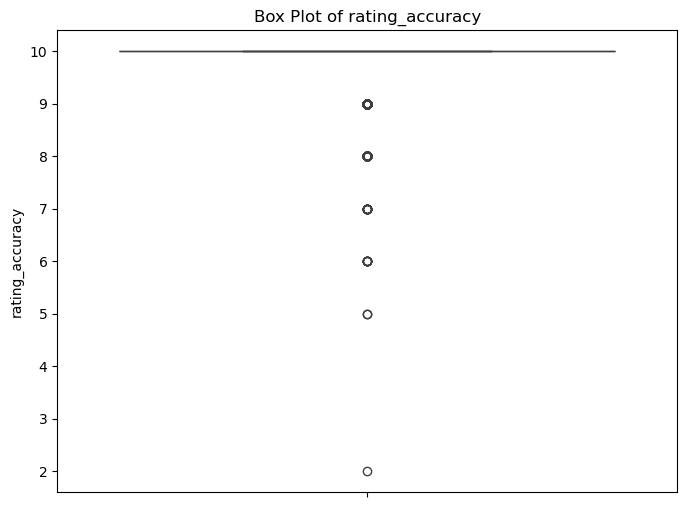

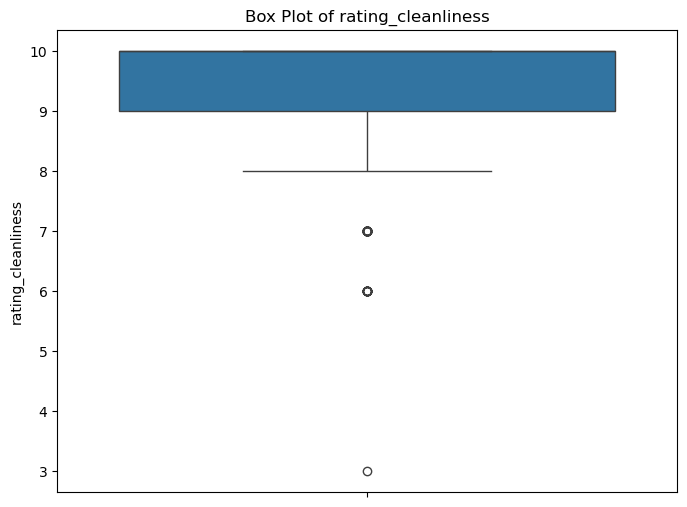

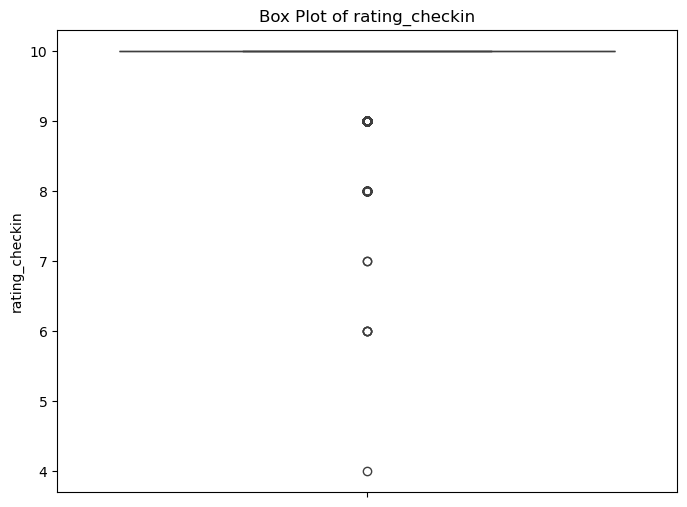

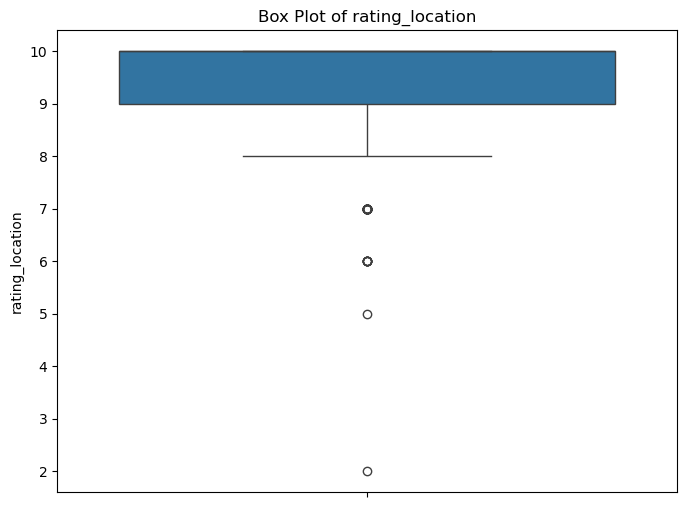

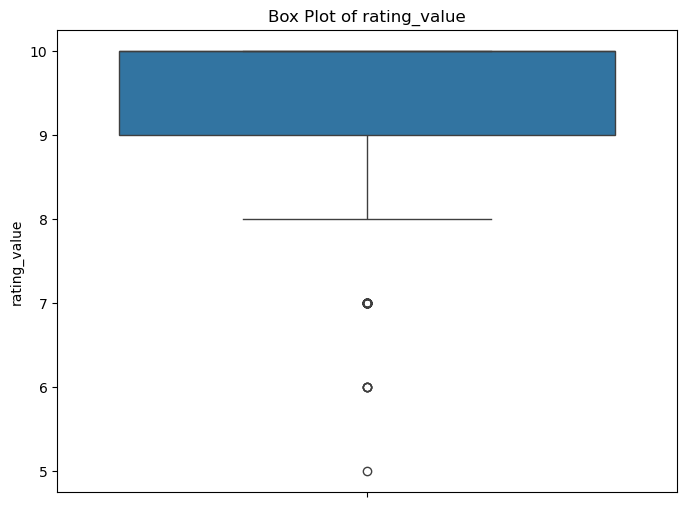

In [ ]:
# Create separate box plots for specified columns
cols = ['bedrooms', 'bathrooms', 'averagedailyrateusd', 'rating_overall',
        'rating_communication', 'rating_accuracy', 'rating_cleanliness',
        'rating_checkin', 'rating_location', 'rating_value']

for col in cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(y=train[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

There are few features that might require trimming as there are outliers

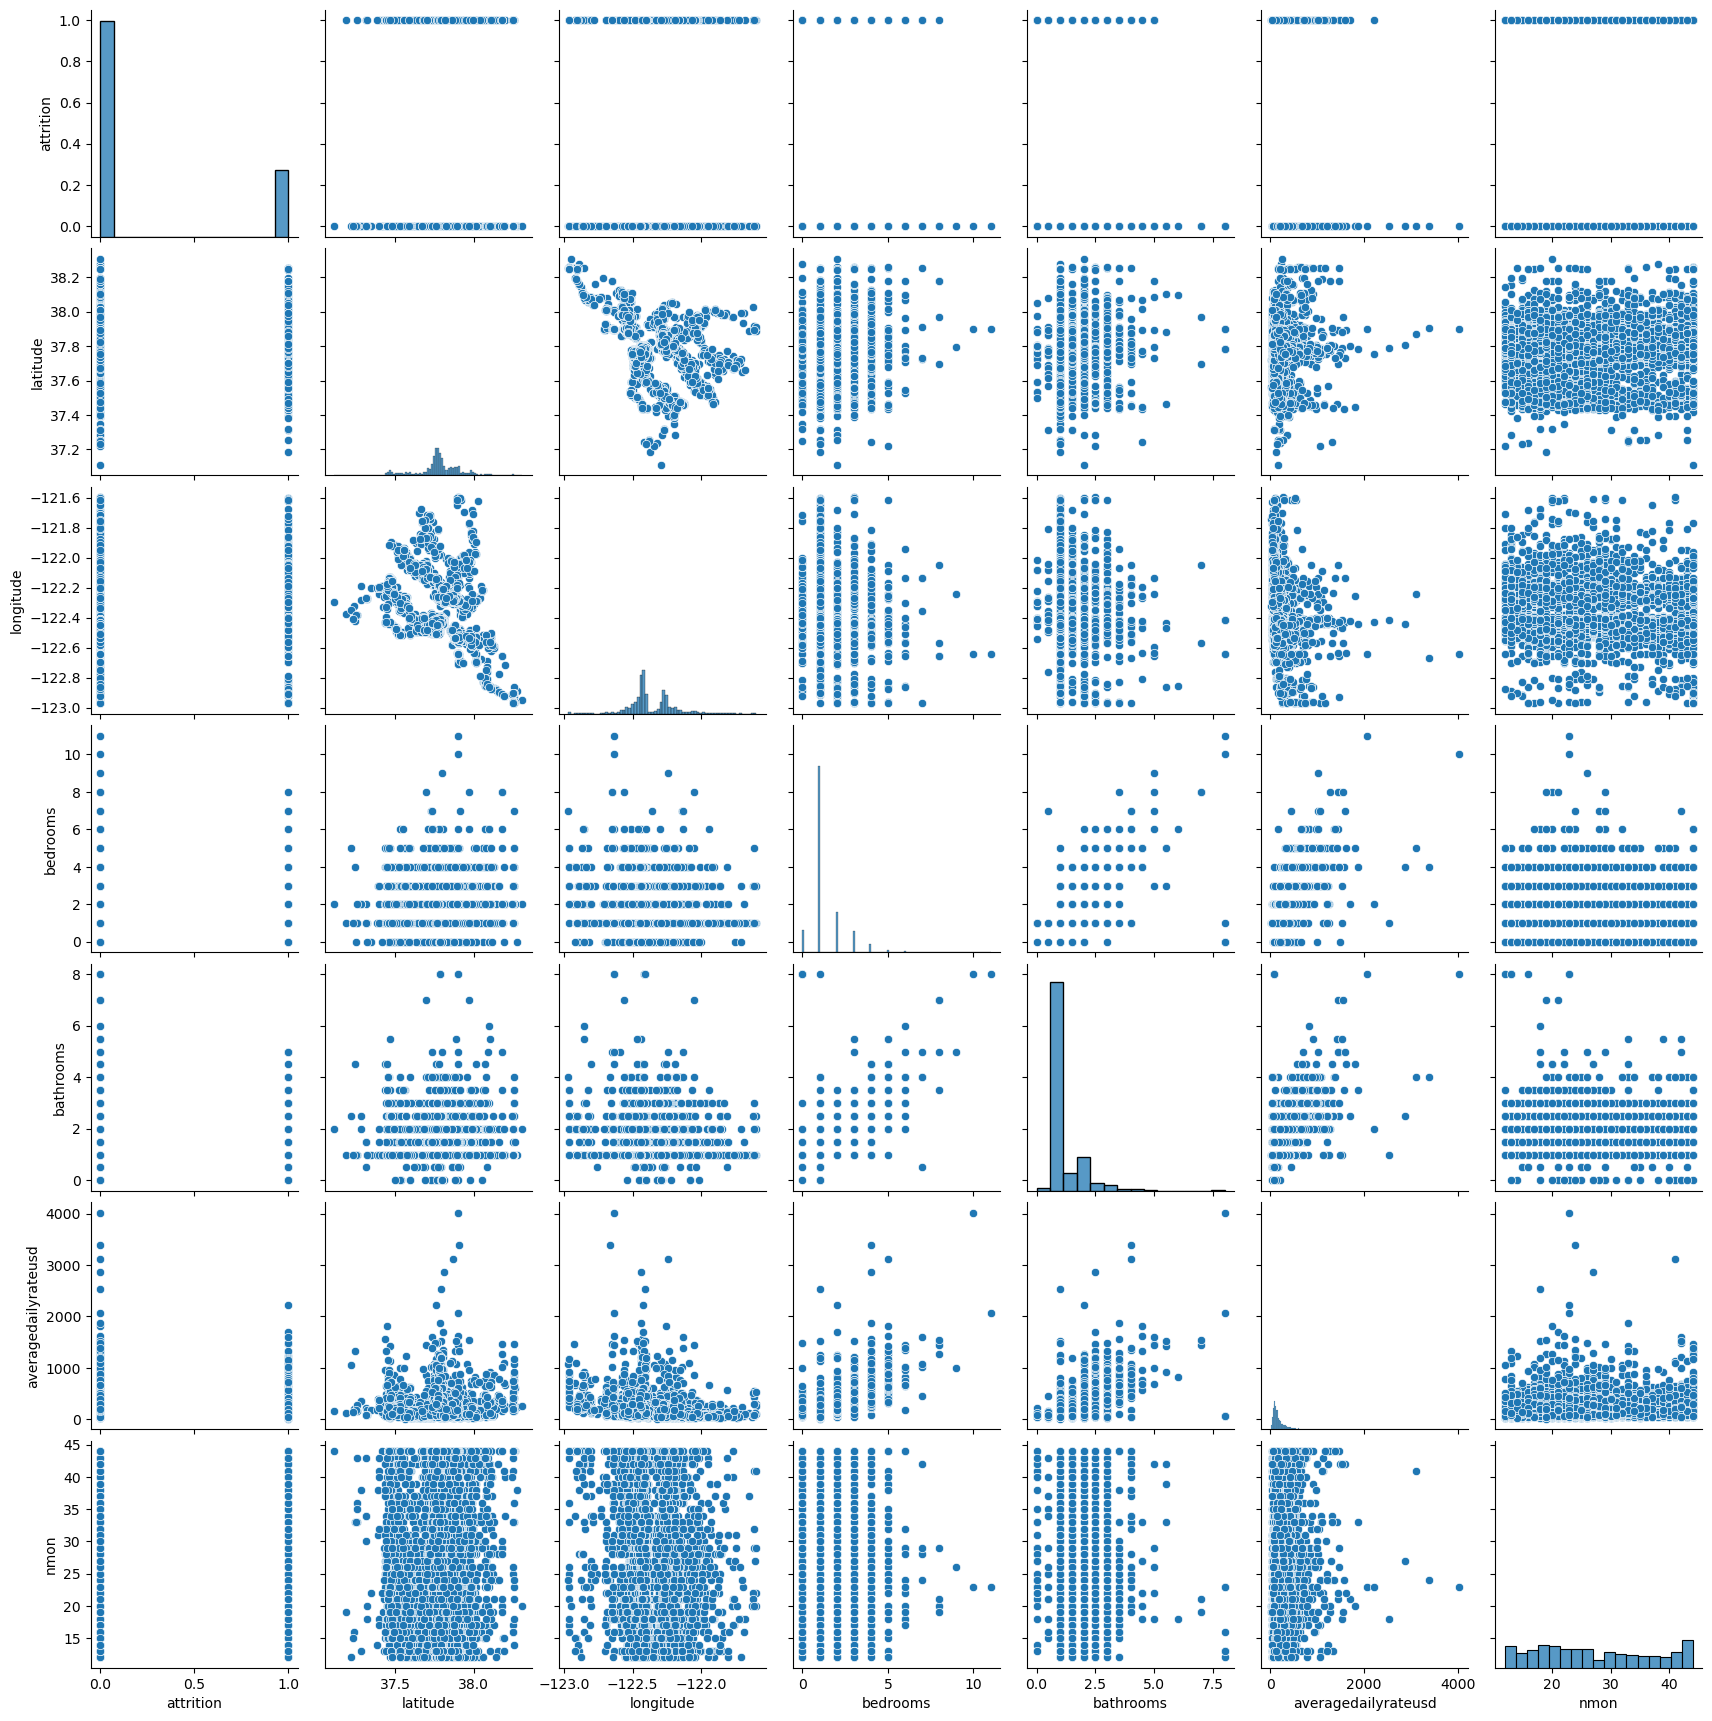

In [ ]:

cols_to_plot = ['attrition', 'latitude', 'longitude', 'bedrooms', 'bathrooms', 'averagedailyrateusd','nmon']

sns.pairplot(train[cols_to_plot])
plt.show()

## 2. Data Cleaning and Feature Engineering

### Creating New Features

Booking Growth Calculation

Purpose: Calculate the Compound Annual Growth Rate (CAGR) between reservation days.

Functions Defined: 
calculate_cagr(start_value, end_value, periods):

Computes CAGR and handles the case where the starting value is zero.

find_first_nonzero(row):

Iterates over reservation day columns (reservationdays1 to reservationdays12) and returns the first non-zero value.

In [ ]:
# prompt: create new column booking_growth = CAGR of reservationdays1 and reservationdays12, if reservationdays1 is 0 then take reservationdays2 and so on

def calculate_cagr(start_value, end_value, periods):
    """Calculates the Compound Annual Growth Rate (CAGR)."""
    if start_value == 0:
        return 0  # Avoid division by zero
    return (end_value / start_value)**(1 / periods) - 1

# Find the first non-zero reservationdays column
def find_first_nonzero(row):
    for i in range(1, 13):
        col_name = f'reservationdays{i}'
        if row[col_name] != 0:
            return row[col_name]
    return 0

# Apply the function to create the 'first_nonzero_reservation' column
train['first_nonzero_reservation'] = train.apply(find_first_nonzero, axis=1)

# Calculate booking_growth
train['booking_growth'] = train.apply(lambda row: calculate_cagr(row['first_nonzero_reservation'], row['reservationdays12'], 11), axis=1)

### Past 6-Month Ratio and Annual Revenue
Past 6 Calculation:

A new column past_6 is created as the ratio of the sum of reservation days for months 7 to 12 over the sum of reservation days for months 1 to 12.

Total Reservations:

The sum of reservation days across all 12 months is computed and stored in totalreservations.

Annual Revenue:

Annual revenue is estimated as the product of averagedailyrateusd and totalreservations.

In [ ]:
# prompt: create new column past_6 which is ratio of sum of reservationdays7 to reservationdays12 / sum of reservationdays1 to reservationdays12

train['past_6'] = train[['reservationdays7', 'reservationdays8', 'reservationdays9', 'reservationdays10', 'reservationdays11', 'reservationdays12']].sum(axis=1) / train[['reservationdays1', 'reservationdays2', 'reservationdays3', 'reservationdays4', 'reservationdays5', 'reservationdays6', 'reservationdays7', 'reservationdays8', 'reservationdays9', 'reservationdays10', 'reservationdays11', 'reservationdays12']].sum(axis=1)

In [ ]:
train['totalreservations'] = train[['reservationdays1', 'reservationdays2', 'reservationdays3', 'reservationdays4', 'reservationdays5', 'reservationdays6', 'reservationdays7', 'reservationdays8', 'reservationdays9', 'reservationdays10', 'reservationdays11', 'reservationdays12']].sum(axis=1)


In [ ]:
# prompt: create new annual revenue

# Calculate annual revenue
train['annual_revenue'] = train['averagedailyrateusd'] * train['totalreservations']

In [ ]:
train.head()

,propertyid,attrition,latitude,longitude,bedrooms,bathrooms,averagedailyrateusd,rating_overall,rating_communication,rating_accuracy,...,reservationdays9,reservationdays10,reservationdays11,reservationdays12,nmon,first_nonzero_reservation,booking_growth,past_6,totalreservations,annual_revenue
0,6091945,0,37.724739,-122.45676,1,1.0,100.10000,90,10,10,...,0.0,0.000000,0.000000,0.000000,18,3.000000,-1.000000,0.052632,9.500000,950.950000
1,7840421,1,37.847099,-122.48069,1,1.0,533.35999,89,10,9,...,5.0,6.500000,2.000000,0.000000,23,6.000000,-1.000000,0.457143,70.000000,37335.199300
2,14357670,0,37.500595,-122.26466,1,1.0,158.63000,99,10,10,...,22.5,29.000000,18.000000,25.000000,20,20.500000,0.018205,0.488774,289.500000,45923.385000
3,6132191,0,37.796326,-122.41190,3,3.0,576.65002,98,10,10,...,11.0,11.666667,6.333334,3.666667,35,7.333334,-0.061069,0.470135,86.500001,49880.227537
4,8249336,0,37.985527,-122.57745,1,1.0,134.53000,98,10,10,...,29.5,26.000000,18.000000,21.333334,29,12.000000,0.053698,0.574603,262.500002,35314.125269


### Feature Selection for Modeling
Predictor Selection:
A list of predictors is defined (e.g., latitude, bedrooms, ratings, engineered features) along with a subset that might contain outliers.

In [ ]:
train.columns

Index(['propertyid', 'attrition', 'latitude', 'longitude', 'bedrooms',
       'bathrooms', 'averagedailyrateusd', 'rating_overall',
       'rating_communication', 'rating_accuracy', 'rating_cleanliness',
       'rating_checkin', 'rating_location', 'rating_value', 'reservationdays1',
       'reservationdays2', 'reservationdays3', 'reservationdays4',
       'reservationdays5', 'reservationdays6', 'reservationdays7',
       'reservationdays8', 'reservationdays9', 'reservationdays10',
       'reservationdays11', 'reservationdays12', 'nmon',
       'first_nonzero_reservation', 'booking_growth', 'past_6',
       'totalreservations', 'annual_revenue'],
      dtype='object')

In [ ]:
predictors = ['latitude', 'longitude', 'bedrooms', 'averagedailyrateusd', 'rating_overall', 'nmon',
       'first_nonzero_reservation', 'booking_growth', 'past_6','totalreservations','annual_revenue']

In [ ]:
predictors_w_outliers = ['bedrooms', 'bathrooms', 'averagedailyrateusd']

In [ ]:
X = train[predictors]
y = train['attrition']

### Extreme Imputer Class
Objective:

Create a class ExtremeImputer that imputes values beyond three standard deviations (upper and lower bounds) with the respective boundary value.

How it Works:

For each specified column, it calculates the mean and standard deviation.
It then determines the upper bound (mean + 3*std) and lower bound (mean - 3*std).
Values exceeding these bounds are replaced with the corresponding bound.

In [ ]:
# prompt: create a class that take dataframe and list of column and impute the maximum and minimum extremes using standard deviation

import pandas as pd
import numpy as np

class ExtremeImputer:
    def __init__(self, df, columns):
        self.df = df
        self.columns = columns

    def impute(self):
        for col in self.columns:
            if col in self.df.columns:
                # Calculate mean and standard deviation
                mean = self.df[col].mean()
                std = self.df[col].std()

                # Define upper and lower bounds
                upper_bound = mean + 3 * std
                lower_bound = mean - 3 * std

                #check col data type
                if self.df[col].dtype == ['int64', 'int32']:
                  upper_bound = np.ceil(upper_bound)
                  lower_bound = np.floor(lower_bound)
                  upper_bound = int(upper_bound)
                  lower_bound = int(lower_bound)

                # Impute extremes
                self.df.loc[self.df[col] > upper_bound, col] = upper_bound
                self.df.loc[self.df[col] < lower_bound, col] = lower_bound
        return self.df

### Standard Scaling Transformer Class

Objective:

Create a class StandardScalerTransformer to standardize selected features.

How it Works:

Uses scikit-learn’s StandardScaler to fit and transform the specified columns.

Replaces the original columns in the DataFrame with their scaled counterparts.

In [ ]:
# prompt: create a class that take dataframe and list of column and do standard scaling

from sklearn.preprocessing import StandardScaler

class StandardScalerTransformer:
    def __init__(self, df, columns):
        self.df = df
        self.columns = columns
        self.scaler = StandardScaler()

    def transform(self):
        # Fit and transform the specified columns
        self.scaler = self.scaler.fit(X)
        scaled_data = self.scaler.transform(self.df[self.columns])

        # Create a new DataFrame with the scaled data
        scaled_df = pd.DataFrame(scaled_data, columns=self.columns, index=self.df.index)

        # Replace original columns with scaled columns
        for col in self.columns:
          self.df[col] = scaled_df[col]

        return self.df

### Pipeline Function

Pipeline Composition:

A helper function pipeline is defined to sequentially apply the ExtremeImputer and StandardScalerTransformer on a given DataFrame. This function facilitates a smooth preprocessing step for any dataset (training, validation, or test).

In [ ]:
# prompt: create a pipeline for already existing ExtremeImputer and StandardScalerTransformer classes, that takes data frame as input (I can give any)

def pipeline(df, outliers, predictors):
    # Create instances of the transformers
    imputer = ExtremeImputer(df.copy(), outliers)
    scaler = StandardScalerTransformer(imputer.impute(), predictors)

    # Apply transformations sequentially
    processed_df = scaler.transform()
    return processed_df

### Data Preparation for Modeling
Train-Test Split:

The predictors (X) and target variable (y, representing attrition) are split into training and validation sets using stratified sampling.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # Adjust test_size and random_state as needed
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(4197, 11) (1050, 11) (4197,) (1050,)


In [ ]:
X_cleaned = pipeline(X_train, predictors_w_outliers, predictors)
X_train_cleaned = pipeline(X_train, predictors_w_outliers, predictors)
X_val_cleaned = pipeline(X_val, predictors_w_outliers, predictors)

/var/folders/tx/1k19h6p14px3c2c676mgbftm0000gn/T/ipykernel_10058/3634657828.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.284406068171723' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df.loc[self.df[col] > upper_bound, col] = upper_bound
/var/folders/tx/1k19h6p14px3c2c676mgbftm0000gn/T/ipykernel_10058/3634657828.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.284406068171723' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df.loc[self.df[col] > upper_bound, col] = upper_bound
/var/folders/tx/1k19h6p14px3c2c676mgbftm0000gn/T/ipykernel_10058/3634657828.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.487691158797146' has dtype i

### LASSO Regression to check linear relations

Lasso regression:

Lasso regresion to get a broad idea of feature importance to get started with feature selection.

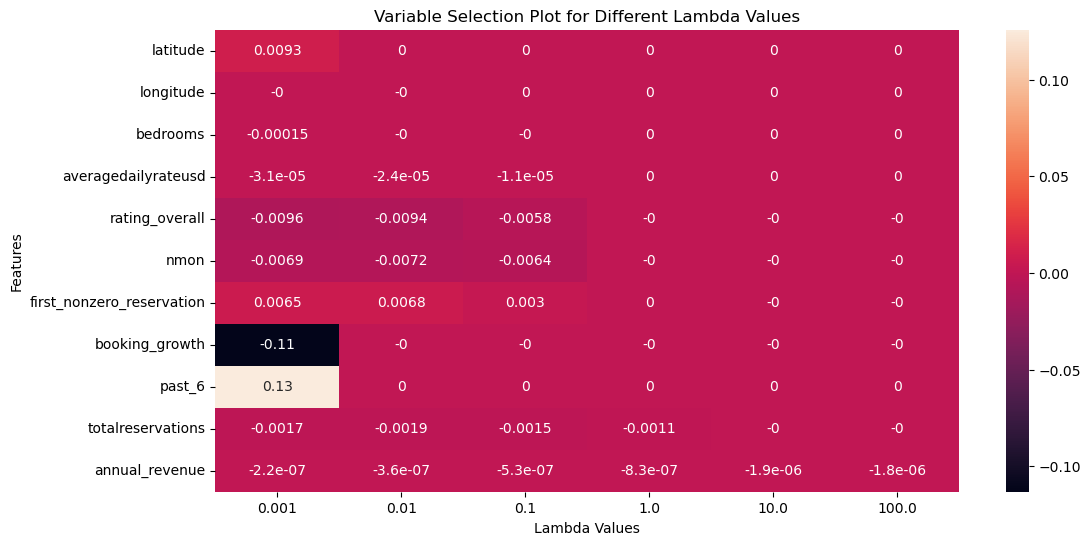

Coefficient Matrix:


,0.001,0.010,0.100,1.000,10.000,100.000
latitude,9.324993e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
longitude,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
bedrooms,-1.492489e-04,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000,0.000000
averagedailyrateusd,-3.073757e-05,-2.434848e-05,-1.111707e-05,0.000000e+00,0.000000,0.000000
rating_overall,-9.570299e-03,-9.361959e-03,-5.767204e-03,-0.000000e+00,-0.000000,-0.000000
nmon,-6.897336e-03,-7.195687e-03,-6.444158e-03,-0.000000e+00,-0.000000,-0.000000
first_nonzero_reservation,6.461537e-03,6.841596e-03,3.012700e-03,0.000000e+00,-0.000000,-0.000000
booking_growth,-1.130996e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000
past_6,1.257480e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
totalreservations,-1.671531e-03,-1.880506e-03,-1.539752e-03,-1.109695e-03,-0.000000,-0.000000


In [ ]:
from sklearn.linear_model import Lasso


lambda_values = [0.001, 0.01, 0.1, 1, 10,100] # Example lambda values
coef_matrix = pd.DataFrame(index = X.columns)

for lam in lambda_values:
    lasso = Lasso(alpha=lam)
    lasso.fit(X, y)
    coef_matrix[lam] = lasso.coef_


# Plotting the variable selection plot
plt.figure(figsize = (12,6))
sns.heatmap(coef_matrix, annot=True)
plt.title("Variable Selection Plot for Different Lambda Values")
plt.xlabel("Lambda Values")
plt.ylabel("Features")
plt.show()


# Print the coefficient matrix as a table
print("Coefficient Matrix:")
coef_matrix

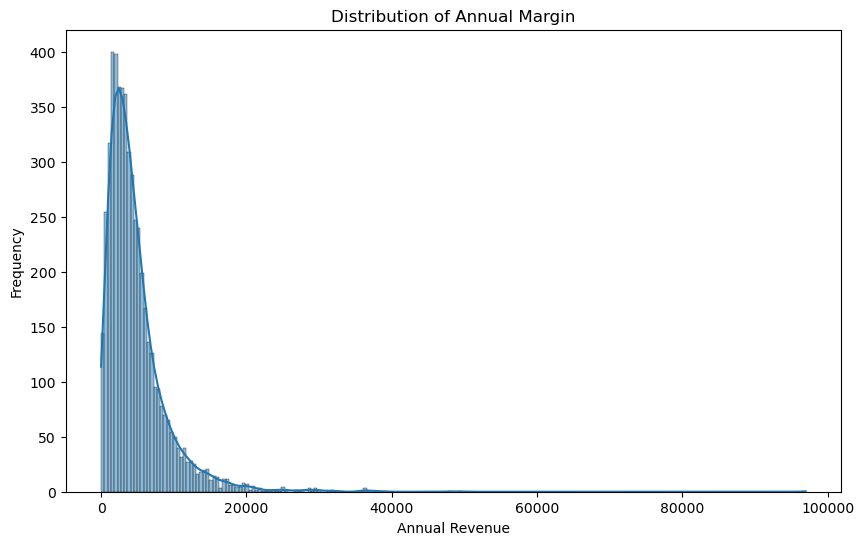

In [ ]:
# margin distribution

plt.figure(figsize=(10, 6))
sns.histplot(train['annual_revenue']*0.15, kde=True)
plt.title('Distribution of Annual Margin')
plt.xlabel('Annual Revenue')
plt.ylabel('Frequency')
plt.show()

## 3. Modeling and Validation

### Ensemble Components:

Three models are used:

Random Forest Classifier

Multi-layer Perceptron (MLP) Classifier

Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingClassifier

estimators =[
    ('rf' , RandomForestClassifier(n_estimators=150, random_state=42, max_depth = 4 , max_features = 'sqrt'
                                   , min_samples_leaf = 5, min_samples_split=8)),
    ('mlp' , MLPClassifier(activation= 'relu', alpha= 0.01,
                           hidden_layer_sizes=(50), learning_rate= 'constant', solver= 'sgd')),
    ('gdbt' , GradientBoostingClassifier(learning_rate = 0.1, max_depth = 2, n_estimators = 150))
]



In [ ]:
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression

clf = StackingClassifier(
    estimators = estimators ,
    final_estimator = LogisticRegression() ,
    cv = 10
)

In [ ]:
clf.fit(X_train, y_train)

print(accuracy_score(y_val, clf.predict(X_val)))

0.7876190476190477


### StackingClassifier:
These models are combined using a stacking approach with Logistic Regression as the final estimator. The ensemble is trained using 10-fold cross-validation.

In [ ]:
clf

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=4,
                                                       min_samples_leaf=5,
                                                       min_samples_split=8,
                                                       n_estimators=150,
                                                       random_state=42)),
                               ('mlp',
                                MLPClassifier(alpha=0.01, hidden_layer_sizes=50,
                                              solver='sgd')),
                               ('gdbt',
                                GradientBoostingClassifier(max_depth=2,
                                                           n_estimators=150))],
                   final_estimator=LogisticRegression())

### Model Evaluation:
Accuracy on the validation set is computed.

ROC curves and AUC values for both training and validation sets are plotted to assess the classifier’s performance.

A confusion matrix and a full classification report (including false positive and false negative rates) are printed.

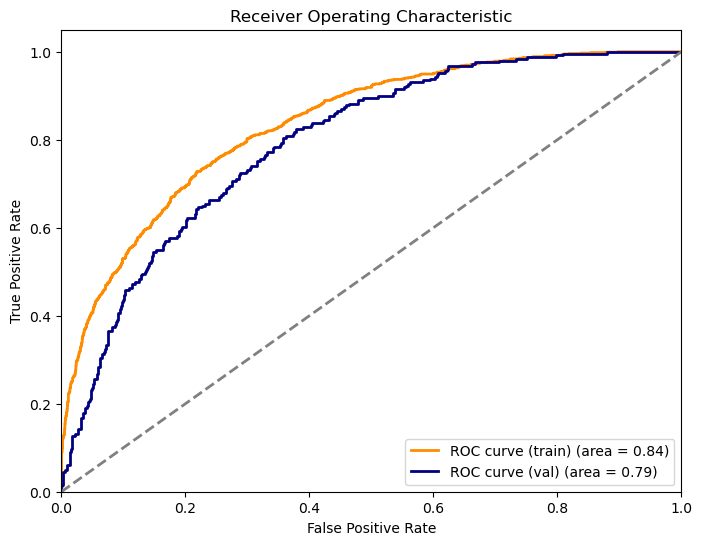

In [ ]:


from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for validation data
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (train) (area = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='navy', lw=2, label=f'ROC curve (val) (area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:


from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'clf' is your trained StackingClassifier and 'X_val', 'y_val' are your validation data
y_pred = clf.predict(X_val)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


# False Positive Rate and False Negative Rate (from the confusion matrix)
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print(f"\nFalse Positive Rate: {false_positive_rate}")
print(f"False Negative Rate: {false_negative_rate}")

Confusion Matrix:
[[751  53]
 [170  76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       804
           1       0.59      0.31      0.41       246

    accuracy                           0.79      1050
   macro avg       0.70      0.62      0.64      1050
weighted avg       0.76      0.79      0.76      1050


False Positive Rate: 0.06592039800995025
False Negative Rate: 0.6910569105691057


### ROI Analysis and Optimal Cutoff Determination
### ROI Data Preparation:
A DataFrame roi_data is created by combining the true attrition labels, the calculated margin, and the predicted probabilities.

In [ ]:
# Predict probabilities for X_val
X_val['pred_proba'] = clf.predict_proba(X_val)[:, 1]

In [ ]:
# Calculate total revenue
X_val['margin'] = X_val['totalreservations'] * X_val['averagedailyrateusd']*0.15

In [ ]:


roi_data = pd.DataFrame()
roi_data['attrition'] = y_val
roi_data['margin'] = X_val['margin']
roi_data['pred_proba'] = X_val['pred_proba']

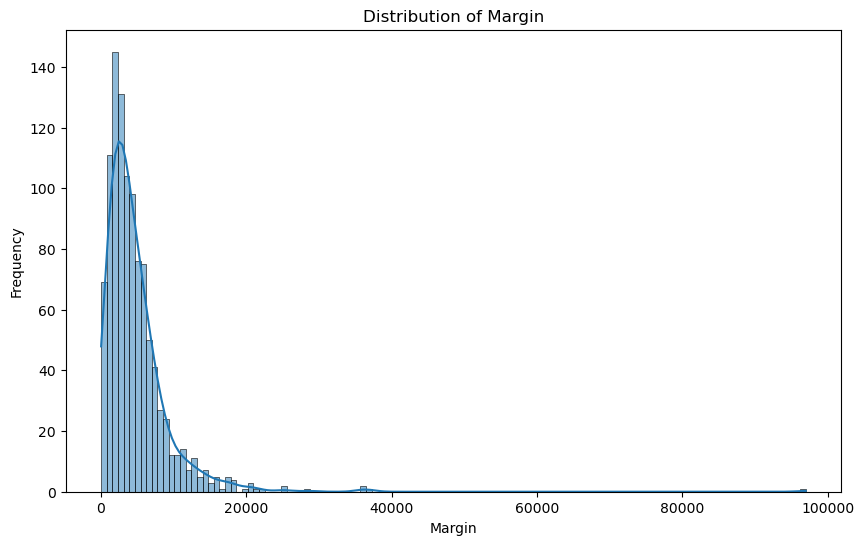

In [ ]:
# prompt: plot the distribution of roe_data[margin]

plt.figure(figsize=(10, 6))
sns.histplot(roi_data['margin'], kde=True)
plt.title('Distribution of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

### Net Profit Analysis:
For various cutoff thresholds:
The code simulates a “retention” decision.
It computes the net profit as the total margin from retained properties minus a cost per retention.

Visualization:

The net profit as a function of the cutoff probability is plotted.
The optimal cutoff that maximizes net profit is identified.

Maximum Net Profit: 4296669.508198563
Optimal Cutoff: 0.17


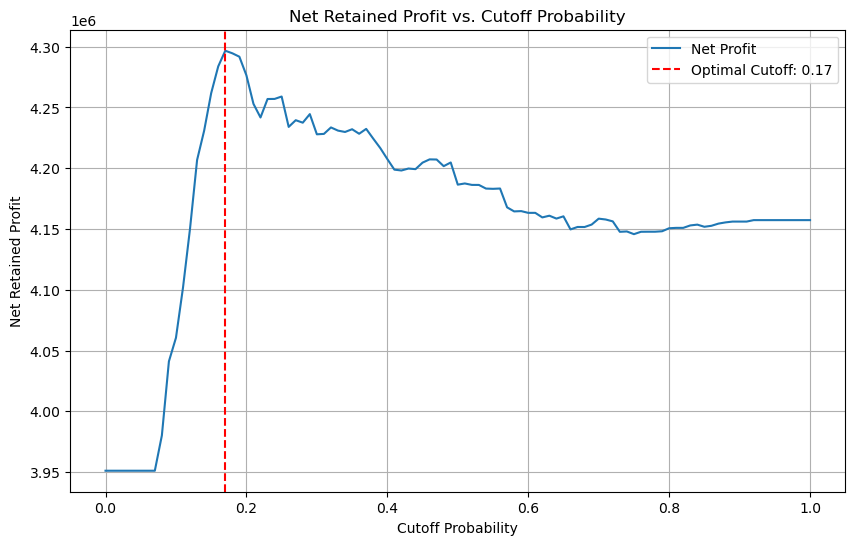

In [ ]:
net_profits = []
cutoffs = np.linspace(0, 1, 101)  # 101 cutoff points between 0 and 1
for cutoff in cutoffs:
    roi_data.loc[:,'to_retain'] = X_val['pred_proba'].apply(lambda x: 1 if x > cutoff else 0)
    roi_data.loc[:,'retained'] = 1  # Default to 1
    roi_data.loc[(roi_data['attrition'] == 1) & (roi_data['to_retain'] == 0), 'retained'] = 0
    retained_profit = roi_data.loc[roi_data['retained'] == 1]['margin'].sum()
    net_retained_profit = retained_profit - roi_data['to_retain'].sum() * 1000
    net_profits.append(net_retained_profit)

# Find the maximum net profit and its corresponding cutoff
max_net_profit = max(net_profits)
optimal_cutoff = cutoffs[net_profits.index(max_net_profit)]
#cutoff_list.append(optimal_cutoff)

print(f"Maximum Net Profit: {max_net_profit}")
print(f"Optimal Cutoff: {optimal_cutoff}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cutoffs, net_profits, label="Net Profit")
plt.axvline(x=optimal_cutoff, color='r', linestyle='--', label=f"Optimal Cutoff: {optimal_cutoff:.2f}")
plt.xlabel("Cutoff Probability")
plt.ylabel("Net Retained Profit")
plt.title("Net Retained Profit vs. Cutoff Probability")
plt.legend()
plt.grid(True)
plt.show()

### Segment-wise Analysis:
The data is split into six segments based on the margin values. For each segment, the optimal cutoff is computed and plotted separately. This segmentation allows a customized retention strategy based on property margin.

In [ ]:
# Calculate the 90th percentile of margin
percentile_90 = roi_data['margin'].quantile(0.9)

# Split the ROI data into six parts
roi_part1 = roi_data[roi_data['margin'] <= 1000]

remaining_data = roi_data[roi_data['margin'] > 1000]
# Calculate quantiles for the remaining data for the 5 splits
quantiles = remaining_data['margin'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])

roi_part2 = remaining_data[(remaining_data['margin'] > 1000) & (remaining_data['margin'] <= quantiles[0.2])]
roi_part3 = remaining_data[(remaining_data['margin'] > quantiles[0.2]) & (remaining_data['margin'] <= quantiles[0.4])]
roi_part4 = remaining_data[(remaining_data['margin'] > quantiles[0.4]) & (remaining_data['margin'] <= quantiles[0.6])]
roi_part5 = remaining_data[(remaining_data['margin'] > quantiles[0.6]) & (remaining_data['margin'] <= quantiles[0.8])]
roi_part6 = remaining_data[(remaining_data['margin'] > quantiles[0.8])]


# Print the shapes of the six parts to verify the split
print("Shape of roi_part1:", roi_part1.shape)
print("Shape of roi_part2:", roi_part2.shape)
print("Shape of roi_part3:", roi_part3.shape)
print("Shape of roi_part4:", roi_part4.shape)
print("Shape of roi_part5:", roi_part5.shape)
print("Shape of roi_part6:", roi_part6.shape)

Shape of roi_part1: (90, 5)
Shape of roi_part2: (192, 5)
Shape of roi_part3: (192, 5)
Shape of roi_part4: (192, 5)
Shape of roi_part5: (192, 5)
Shape of roi_part6: (192, 5)


Maximum Net Profit: 28347.869054397477
Optimal Cutoff: 0.92


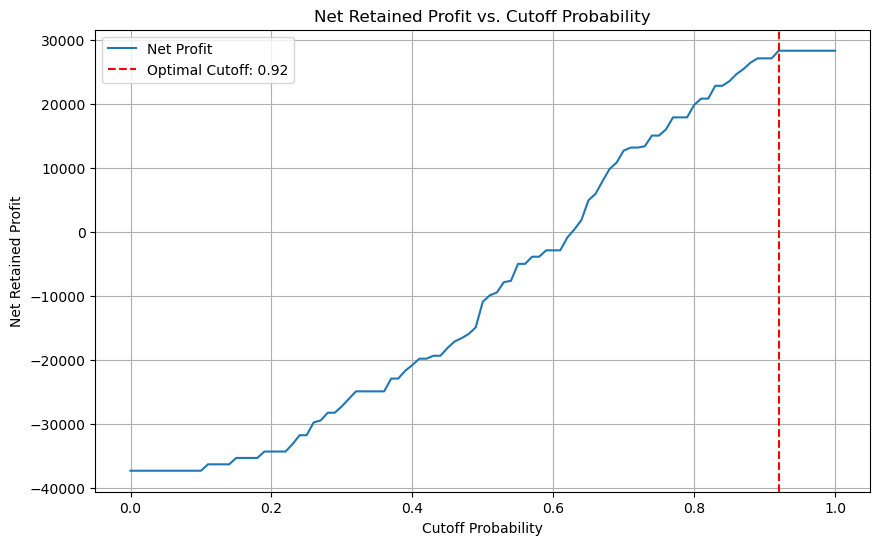

----------------------------------------------------------------------------------------------------------------
Maximum Net Profit: 213576.16644435097
Optimal Cutoff: 0.84


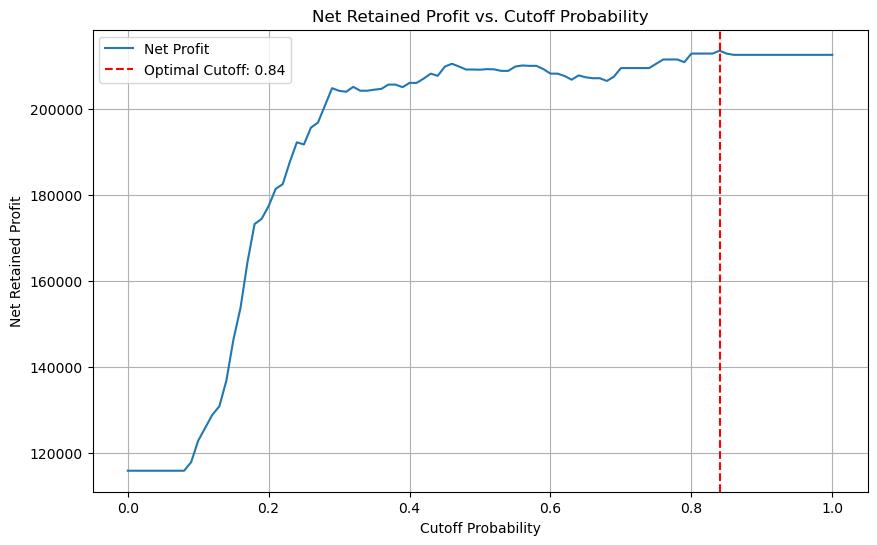

----------------------------------------------------------------------------------------------------------------
Maximum Net Profit: 421476.14238663134
Optimal Cutoff: 0.39


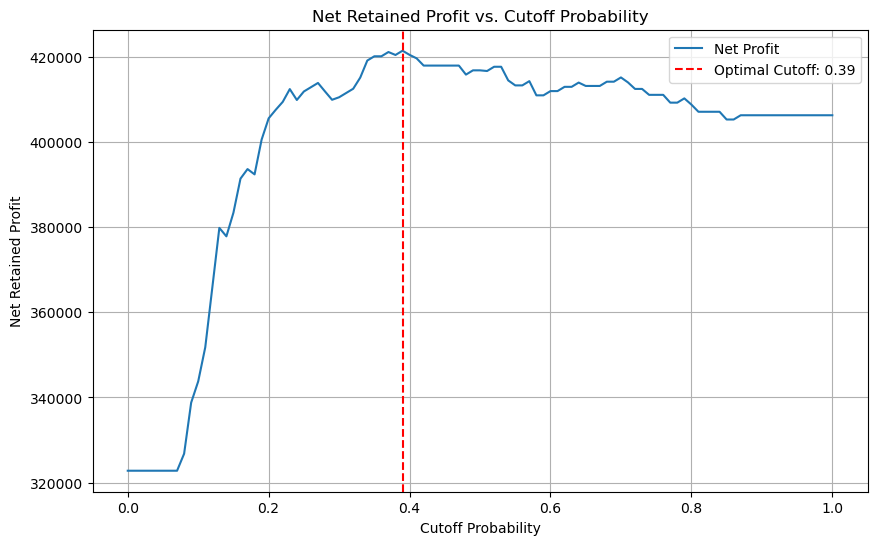

----------------------------------------------------------------------------------------------------------------
Maximum Net Profit: 633514.6907069995
Optimal Cutoff: 0.15


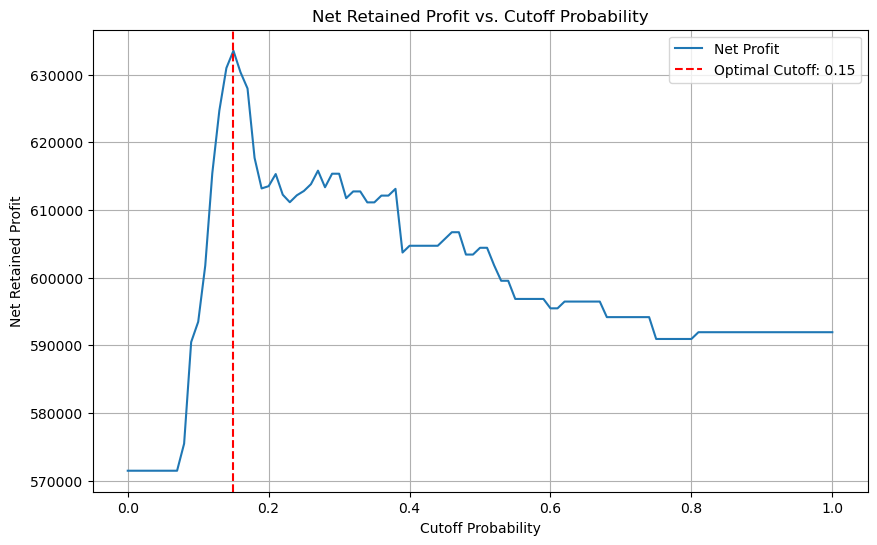

----------------------------------------------------------------------------------------------------------------
Maximum Net Profit: 1013087.1541586947
Optimal Cutoff: 0.18


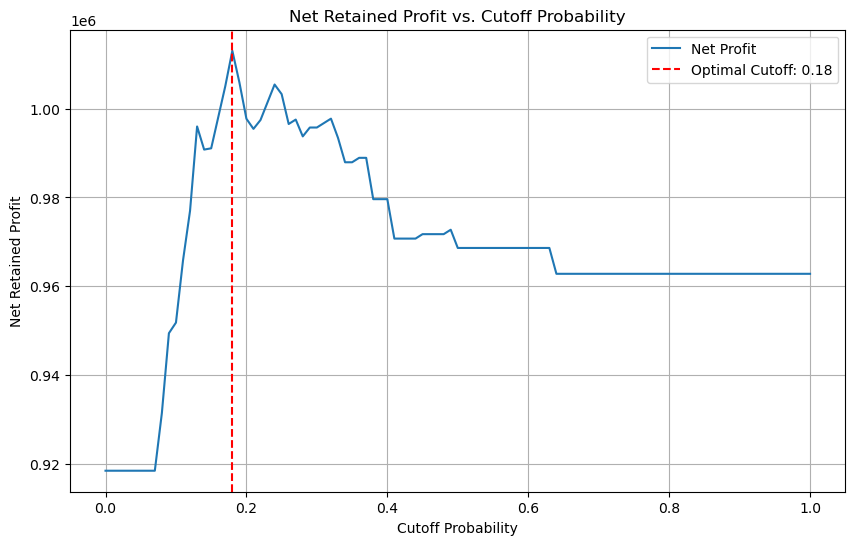

----------------------------------------------------------------------------------------------------------------
Maximum Net Profit: 2145575.267070096
Optimal Cutoff: 0.16


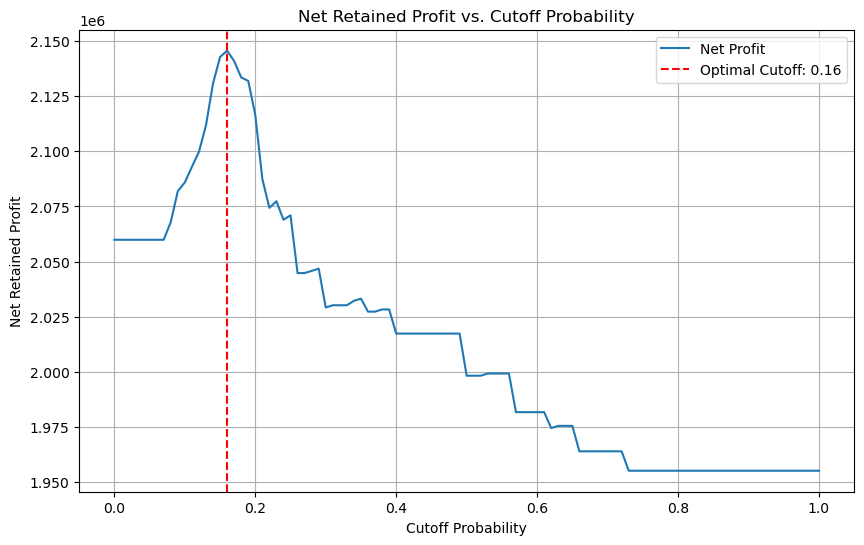

----------------------------------------------------------------------------------------------------------------
[0.92, 0.84, 0.39, 0.15, 0.18, 0.16]


In [ ]:
data_parts = [roi_part1, roi_part2, roi_part3, roi_part4, roi_part5, roi_part6]
cutoff_list = []
for data_part in data_parts:
  net_profits = []
  cutoffs = np.linspace(0, 1, 101)  # 101 cutoff points between 0 and 1
  for cutoff in cutoffs:
      data_part.loc[:,'to_retain'] = X_val['pred_proba'].apply(lambda x: 1 if x > cutoff else 0)
      data_part.loc[:,'retained'] = 1  # Default to 1
      data_part.loc[(data_part['attrition'] == 1) & (data_part['to_retain'] == 0), 'retained'] = 0
      retained_profit = data_part.loc[data_part['retained'] == 1]['margin'].sum()
      net_retained_profit = retained_profit - data_part['to_retain'].sum() * 1000
      net_profits.append(net_retained_profit)

  # Find the maximum net profit and its corresponding cutoff
  max_net_profit = max(net_profits)
  optimal_cutoff = cutoffs[net_profits.index(max_net_profit)]
  cutoff_list.append(optimal_cutoff)

  print(f"Maximum Net Profit: {max_net_profit}")
  print(f"Optimal Cutoff: {optimal_cutoff}")

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(cutoffs, net_profits, label="Net Profit")
  plt.axvline(x=optimal_cutoff, color='r', linestyle='--', label=f"Optimal Cutoff: {optimal_cutoff:.2f}")
  plt.xlabel("Cutoff Probability")
  plt.ylabel("Net Retained Profit")
  plt.title("Net Retained Profit vs. Cutoff Probability")
  plt.legend()
  plt.grid(True)
  plt.show()

  print("----------------------------------------------------------------------------------------------------------------")

cutoff_df = pd.DataFrame({'part': range(1, 7), 'optimal_cutoff': cutoff_list})
print(cutoff_list)

Observations:

Based on our analysis we found that all the sets of the properties have different optimal cuttoffs.

## 4. Refitting and Final Prediction

### Feature Engineering on Test Data
Replication of Training Features:

The same feature engineering steps applied to the training data are performed on the test data:
first_nonzero_reservation
booking_growth
past_6
totalreservations
annual_revenue

Data Preprocessing:

The test set is passed through the same pipeline (extreme imputation and standard scaling) to ensure consistency with the training data.

In [ ]:
# Apply the function to create the 'first_nonzero_reservation' column
test['first_nonzero_reservation'] = test.apply(find_first_nonzero, axis=1)

# Calculate booking_growth
test['booking_growth'] = test.apply(lambda row: calculate_cagr(row['first_nonzero_reservation'], row['reservationdays12'], 11), axis=1)

In [ ]:
# prompt: create new column past_6 which is ratio of sum of reservationdays7 to reservationdays12 / sum of reservationdays1 to reservationdays12

test['past_6'] = test[['reservationdays7', 'reservationdays8', 'reservationdays9', 'reservationdays10', 'reservationdays11', 'reservationdays12']].sum(axis=1) / test[['reservationdays1', 'reservationdays2', 'reservationdays3', 'reservationdays4', 'reservationdays5', 'reservationdays6', 'reservationdays7', 'reservationdays8', 'reservationdays9', 'reservationdays10', 'reservationdays11', 'reservationdays12']].sum(axis=1)

In [ ]:
test['totalreservations'] = test[['reservationdays1', 'reservationdays2', 'reservationdays3', 'reservationdays4', 'reservationdays5', 'reservationdays6', 'reservationdays7', 'reservationdays8', 'reservationdays9', 'reservationdays10', 'reservationdays11', 'reservationdays12']].sum(axis=1)

In [ ]:
# prompt: create new annual revenue

# Calculate annual revenue
test['annual_revenue'] = test['averagedailyrateusd'] * test['totalreservations']

In [ ]:
X_test = pipeline(test, predictors_w_outliers, predictors)

/var/folders/tx/1k19h6p14px3c2c676mgbftm0000gn/T/ipykernel_10058/3634657828.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.540961827283949' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df.loc[self.df[col] > upper_bound, col] = upper_bound


In [ ]:
X_test = X_test[predictors]

### Refitting the Ensemble:
A new stacking classifier (clf_final) is trained on the entire training set.

In [ ]:
clf_final = StackingClassifier(
    estimators = estimators ,
    final_estimator = LogisticRegression() ,
    cv = 10
)

In [ ]:
clf_final.fit(X, y)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=4,
                                                       min_samples_leaf=5,
                                                       min_samples_split=8,
                                                       n_estimators=150,
                                                       random_state=42)),
                               ('mlp',
                                MLPClassifier(alpha=0.01, hidden_layer_sizes=50,
                                              solver='sgd')),
                               ('gdbt',
                                GradientBoostingClassifier(max_depth=2,
                                                           n_estimators=150))],
                   final_estimator=LogisticRegression())

### Probability Predictions:
Predicted probabilities for attrition are generated for the test set and stored in the column prep_prob.

In [ ]:
y_test = clf_final.predict_proba(X_test)[:, 1]
test['prep_prob'] = y_test
test['margin'] = test['annual_revenue']*0.15

Segmentation of Test Data:
The test data is segmented into six parts using margin quantiles, similar to the training process.

In [ ]:
# Calculate the 90th percentile of margin
percentile_90 = test['margin'].quantile(0.9)

# Split the ROI data into six parts
test_part1 = test[test['margin'] <= 1000]

remaining_data = test[test['margin'] > 1000]
# Calculate quantiles for the remaining data for the 5 splits
quantiles = remaining_data['margin'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])

test_part2 = remaining_data[(remaining_data['margin'] > 1000) & (remaining_data['margin'] <= quantiles[0.2])]
test_part3 = remaining_data[(remaining_data['margin'] > quantiles[0.2]) & (remaining_data['margin'] <= quantiles[0.4])]
test_part4 = remaining_data[(remaining_data['margin'] > quantiles[0.4]) & (remaining_data['margin'] <= quantiles[0.6])]
test_part5 = remaining_data[(remaining_data['margin'] > quantiles[0.6]) & (remaining_data['margin'] <= quantiles[0.8])]
test_part6 = remaining_data[(remaining_data['margin'] > quantiles[0.8])]


# Print the shapes of the six parts to verify the split
print("Shape of test_part1:", test_part1.shape)
print("Shape of test_part2:", test_part2.shape)
print("Shape of test_part3:", test_part3.shape)
print("Shape of test_part4:", test_part4.shape)
print("Shape of test_part5:", test_part5.shape)
print("Shape of test_part6:", test_part6.shape)

Shape of test_part1: (97, 33)
Shape of test_part2: (243, 33)
Shape of test_part3: (243, 33)
Shape of test_part4: (243, 33)
Shape of test_part5: (243, 33)
Shape of test_part6: (243, 33)


Assigning Labels:
Each test data point is labeled (1 through 6) based on its margin segment.

In [ ]:
# prompt: create a label in test data frame based on which part of the data it is.

test['label'] = ''
test.loc[test['margin'] <= 1000, 'label'] = 1
test.loc[(test['margin'] > 1000) & (test['margin'] <= quantiles[0.2]), 'label'] = 2
test.loc[(test['margin'] > quantiles[0.2]) & (test['margin'] <= quantiles[0.4]), 'label'] = 3
test.loc[(test['margin'] > quantiles[0.4]) & (test['margin'] <= quantiles[0.6]), 'label'] = 4
test.loc[(test['margin'] > quantiles[0.6]) & (test['margin'] <= quantiles[0.8]), 'label'] = 5
test.loc[(test['margin'] > quantiles[0.8]), 'label'] = 6

### Retention Decision ("Gift") Calculation:
A predefined cutoff DataFrame (cutoff_df) containing the optimal cutoffs for each segment is merged with the test data.

In [ ]:
cutoff_df.loc[cutoff_df['part'] == 1, 'optimal_cutoff'] = 0
cutoff_df.loc[cutoff_df['part'] == 2, 'optimal_cutoff'] = 0.8
cutoff_df.loc[cutoff_df['part'] == 3, 'optimal_cutoff'] = 0.7
cutoff_df.loc[cutoff_df['part'] == 4, 'optimal_cutoff'] = 0.6
cutoff_df.loc[cutoff_df['part'] == 5, 'optimal_cutoff'] = 0.2
cutoff_df.loc[cutoff_df['part'] == 6, 'optimal_cutoff'] = 0.2

A new column gift is created:
For properties where the predicted probability is greater than or equal to the segment’s optimal cutoff, the value is set to 1 (indicating that the property should be retained with a “gift” offer).

For very low-margin properties (label 1), gift is set to 0 as retaining them is not profitable.

In [ ]:


# Merge the cutoff values into the test DataFrame based on the 'label' column
test = pd.merge(test, cutoff_df, left_on='label', right_on='part', how='left')

# Create the 'gift' column based on the optimal cutoff
test['gift'] = test.apply(lambda row: 1 if row['prep_prob'] >= row['optimal_cutoff'] else 0, axis=1)

In [ ]:
# because no point in retaining the low margin properties

test.loc[test['label'] == 1, 'gift'] = 0

Checking the predicted results

In [ ]:
result = test.groupby('label')['gift'].agg(['sum', 'count']).reset_index()
result

,label,sum,count
0,1,0,97
1,2,177,243
2,3,239,243
3,4,241,243
4,5,243,243
5,6,243,243


In [ ]:
test['gift'].value_counts()

gift
1    1143
0     169
Name: count, dtype: int64

### Output:
The final test dataset is saved as submission.csv, and summary statistics (like the total number of gifts) are printed.

In [ ]:
test.to_csv('submission.csv', index=False)

## Thank you